# Análise experimental

Tanto o script shell e o arquivo gerador de entradas rândomicas podem ser encontrados na pasta "/experimental", juntamente com o jupyternotebook utilizado.

Algumas informações importantes:
    1- Manteve-se o número de jogadores constante e igual a "11", as posições iniciais são definidas de maneira aleatoria e podem repetir.
    2- Forem gerados 50 testes para cada tamanho de entrada, a média e o desvio padrão desses valores foram usados para gerar os gráficos.
    3- Foram considerados tabuleiros quadraticos (N=M).
    4- Os tamanhos da entrada (N e M) variam de 10x10 até cerca de 100000x100000 e são incrementados em 200x200.

Obs: Uma versão da main que pegava as entradas por cin foi utilizada para gerar o arquivo de tempos, a versão da main também se encontra na pasta experimental e a unica diferença é o tipo de entrada. (arquivo x cin).

## Load dos dados:

In [1]:
with open("tempos.txt") as f:
    lines = f.readlines()

In [2]:
tempos = dict()

i = 0
last_value = 0
for line in lines:
    if(i % 2 == 0): #time
        time = line[:1] + '.' + line[2:5]
        time = float(time)
    else: #value
        value = ""
        for k in line:
            if(k != ' '):
                value+=k
            else:
                break
        value = float(value)
        if(last_value == 0):
            last_value = value;
            individual_value = list()
        if(last_value == value):
            individual_value.append(time)
        else:
            tempos[last_value] = individual_value;
            individual_value = list()
            last_value = value
            individual_value.append(time)
            
    i+=1
    

## Calculo da média e do desvio padrão de cada valor

In [3]:
import statistics
media_tempos = dict()
desvio_tempos = dict()
for tempo in tempos:
    media_tempos[tempo] = statistics.mean(tempos[tempo])
    desvio_tempos[tempo] = statistics.pstdev(tempos[tempo])

## Gráfico do tempo de sys médio por tamanho da entrada

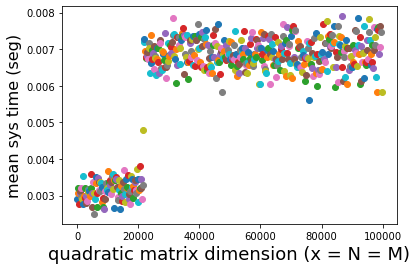

In [4]:
import matplotlib.pyplot as plt

for tempo in media_tempos:
    x = tempo
    y = media_tempos[tempo]
    plt.scatter(x,y)

plt.xlabel('quadratic matrix dimension (x = N = M)', fontsize=18)
plt.ylabel('mean sys time (seg)', fontsize=16)
plt.show()

# Gráfico do desvio padrão por tamanho da entrada

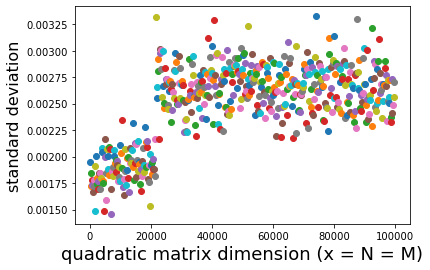

In [5]:
for value in desvio_tempos:
    x = value
    y = desvio_tempos[value]
    plt.scatter(x,y)

plt.xlabel('quadratic matrix dimension (x = N = M)', fontsize=18)
plt.ylabel('standard deviation', fontsize=16)
plt.show()